# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid": weather_api_key,
    "q": "city",
    "units": "metric"
}

response = requests.get(url, params)
print(response.url)
response.json()
    
data= response.json()

print(json.dumps(data, indent=4))

http://api.openweathermap.org/data/2.5/weather?appid=e61334b19fef09307be75f8ae2ff82d9&q=city&units=metric
{
    "coord": {
        "lon": 149.13,
        "lat": -35.28
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 14.89,
        "feels_like": 12.08,
        "temp_min": 14.44,
        "temp_max": 15,
        "pressure": 1025,
        "humidity": 54
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.6,
        "deg": 350
    },
    "clouds": {
        "all": 32
    },
    "dt": 1601342700,
    "sys": {
        "type": 1,
        "id": 9588,
        "country": "AU",
        "sunrise": 1601322169,
        "sunset": 1601366683
    },
    "timezone": 36000,
    "id": 2172517,
    "name": "City",
    "cod": 200
}


In [4]:
#Create a dictionary to store the data
data = {
    "City":[],
    "Cloudiness":[],
    "Country":[],
    "Date":[],
    "Humidity":[],
    "Lat":[],
    "Lng":[],
    "Max Temp":[],
    "Wind Speed":[]
}
count = 1

In [5]:
print("Beginning Data Retrieval")
print('-----------------------------')
for city in cities:
    print(f"Processing Record {count} | {city}")
    params["q"] = city
    response = requests.get(url,params).json()
    
    if response["cod"] == "404":
        print("City not found. Try another city...")
    else:
        data["City"].append(city)
        data["Cloudiness"].append(response["clouds"]["all"])
        data["Country"].append(response["sys"]["country"])
        data["Date"].append(response["dt"])
        data["Humidity"].append(response["main"]["humidity"])
        data["Lat"].append(response["coord"]["lat"])
        data["Lng"].append(response["coord"]["lon"])
        data["Max Temp"].append(response["main"]["temp_max"])
        data["Wind Speed"].append(response["wind"]["speed"])
    count += 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | ponta do sol
Processing Record 2 | vaitupu
City not found. Try another city...
Processing Record 3 | busselton
Processing Record 4 | ciras
City not found. Try another city...
Processing Record 5 | albany
Processing Record 6 | cape town
Processing Record 7 | zhigansk
Processing Record 8 | yellowknife
Processing Record 9 | tera
Processing Record 10 | bluff
Processing Record 11 | upernavik
Processing Record 12 | hermanus
Processing Record 13 | avarua
Processing Record 14 | fare
Processing Record 15 | banda aceh
Processing Record 16 | mahebourg
Processing Record 17 | mataura
Processing Record 18 | dongsheng
Processing Record 19 | punta arenas
Processing Record 20 | fureidis
Processing Record 21 | barrow
Processing Record 22 | fort walton beach
Processing Record 23 | norman wells
Processing Record 24 | torbay
Processing Record 25 | ushuaia
Processing Record 26 | esperance
Processing Record 27 | mar del plata
Proces

Processing Record 220 | faya
Processing Record 221 | dunedin
Processing Record 222 | bereda
Processing Record 223 | maloshuyka
City not found. Try another city...
Processing Record 224 | deori
Processing Record 225 | batticaloa
Processing Record 226 | portland
Processing Record 227 | vilhena
Processing Record 228 | saint-francois
Processing Record 229 | jalesar
Processing Record 230 | arraial do cabo
Processing Record 231 | la orilla
Processing Record 232 | lagoa
Processing Record 233 | sakaiminato
Processing Record 234 | cabatuan
Processing Record 235 | encruzilhada
Processing Record 236 | kismayo
Processing Record 237 | kuhdasht
Processing Record 238 | sao filipe
Processing Record 239 | vostok
Processing Record 240 | kribi
Processing Record 241 | bengkulu
Processing Record 242 | porto santo
Processing Record 243 | panguna
Processing Record 244 | chifeng
Processing Record 245 | yar-sale
Processing Record 246 | pilar
Processing Record 247 | mayo
Processing Record 248 | pevek
Processing

Processing Record 449 | kongolo
Processing Record 450 | auki
Processing Record 451 | donskoy
Processing Record 452 | tarakan
Processing Record 453 | livingston
Processing Record 454 | bagdarin
Processing Record 455 | seoni
Processing Record 456 | dubuque
Processing Record 457 | shakawe
Processing Record 458 | paamiut
Processing Record 459 | dosso
Processing Record 460 | nouadhibou
Processing Record 461 | wadi maliz
Processing Record 462 | marcona
City not found. Try another city...
Processing Record 463 | asuncion
Processing Record 464 | rosario
Processing Record 465 | bandarbeyla
Processing Record 466 | tuatapere
Processing Record 467 | khairpur nathan shah
Processing Record 468 | hamilton
Processing Record 469 | shimoda
Processing Record 470 | flinders
Processing Record 471 | bhindar
Processing Record 472 | zhanaozen
Processing Record 473 | tigzirt
Processing Record 474 | karakendzha
City not found. Try another city...
Processing Record 475 | opuwo
Processing Record 476 | cabo san lu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
data_df = pd.DataFrame(data)
data_df.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0  ponta do sol          75      PT  1601342873        82  32.67  -17.10   
1     busselton         100      AU  1601342873        94 -33.65  115.33   
2        albany           0      US  1601342874        84  42.60  -73.97   
3     cape town           9      ZA  1601342874        93 -33.93   18.42   
4      zhigansk         100      RU  1601342875        95  66.77  123.37   

   Max Temp  Wind Speed  
0     20.00        6.20  
1     16.11        2.68  
2     22.22        3.23  
3     12.22        2.10  
4      1.54       11.27

In [7]:
# Output File (CSV)
data_df.to_csv("../output_data/weather_output.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

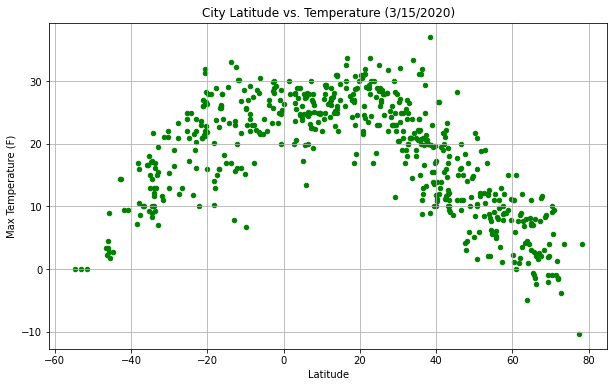

In [16]:
data_df.plot(kind='scatter', figsize=(10, 6), x='Lat',y='Max Temp', color="green",title='City Latitude vs. Temperature (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Temp.png")
plt.show()


#### Latitude vs. Humidity Plot

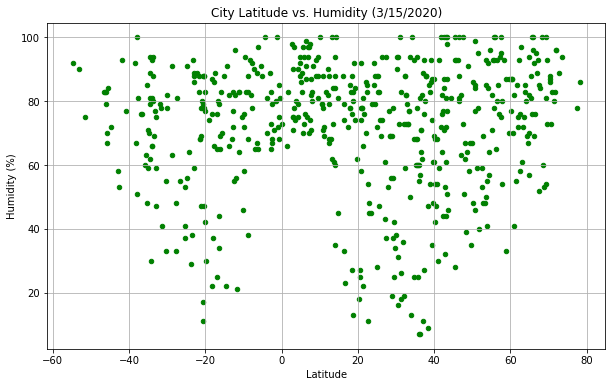

In [17]:
data_df.plot(kind='scatter',figsize=(10, 6), x='Lat',y='Humidity',color="green", title='City Latitude vs. Humidity (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Humid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

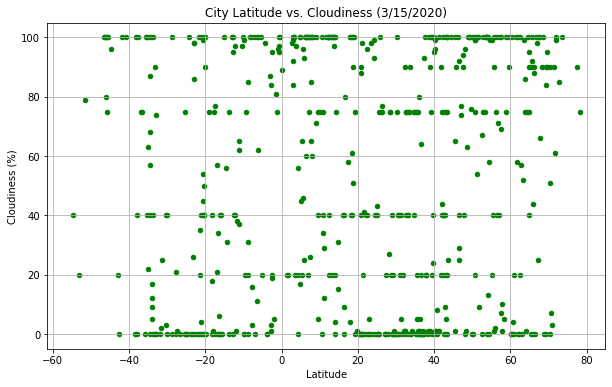

In [18]:
data_df.plot(kind='scatter', figsize=(10, 6), x='Lat',y='Cloudiness',color="green", title='City Latitude vs. Cloudiness (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Cloud.png")
plt.show()

#### Latitude vs. Wind Speed Plot

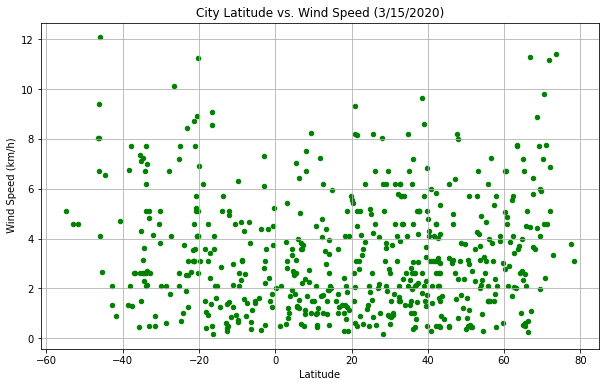

In [20]:
data_df.plot(kind='scatter', figsize=(10, 6), x='Lat',y='Wind Speed', color="green",title='City Latitude vs. Wind Speed (3/15/2020)')
plt.xlabel('Latitude')
plt.ylabel(' Wind Speed (km/h)')
plt.grid(b=True)
plt.savefig("../Images/Lat_Wind.png")
plt.show()

## Linear Regression

In [29]:
result= st.linregress(data_df["Lat"], data_df["Max Temp"])
result

LinregressResult(slope=-0.10019787982419875, intercept=20.19902032753247, rvalue=-0.35868942365164624, pvalue=1.1728493898659568e-18, stderr=0.010970086079643568)

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.astype(float), y.astype(float))
    regress_values = x.astype(float) * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolors = "green")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(),y.max()),fontsize=12,color="red")
    print(f'The r-squared is: {rvalue}')

In [32]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = data_df.loc[data_df["Lat"] >= 0]
southern_df = data_df.loc[data_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8343537623851165


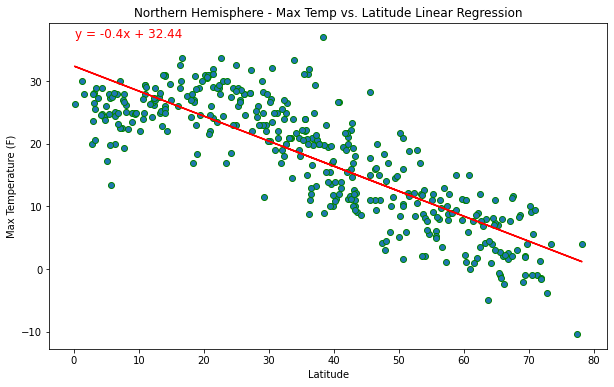

In [40]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7491744304739749


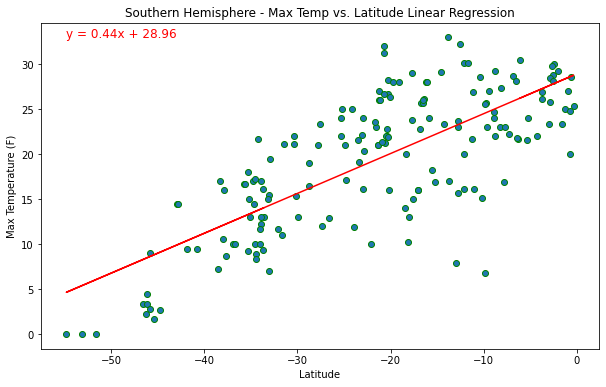

In [41]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("../Images/SH_lat_vs_temp.png")

The high r value indicates a strong positive correlation between latitude and max temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03464692315509804


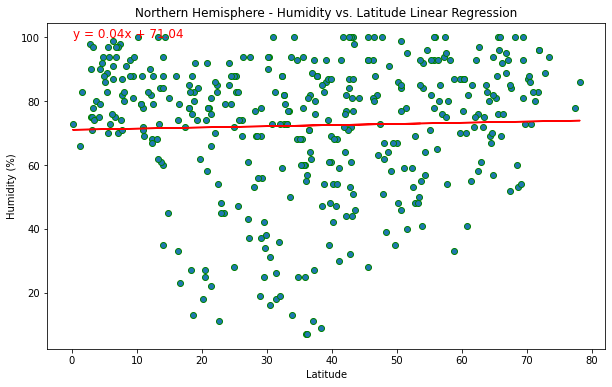

In [43]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Humidity"])
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03407142954757836


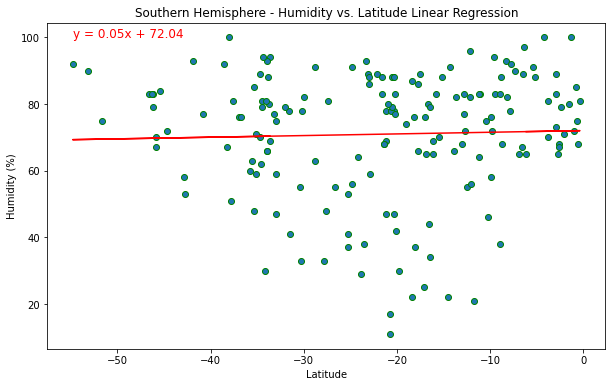

In [45]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Humidity"])
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/SH_lat_vs_humid.png")

The low r values indicate a weak to no relationship between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03316909316377324


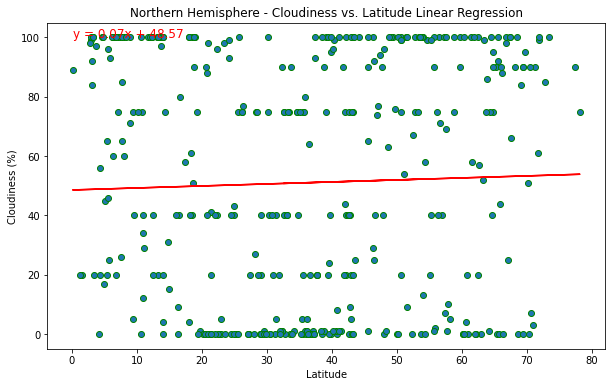

In [46]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.005887582400261361


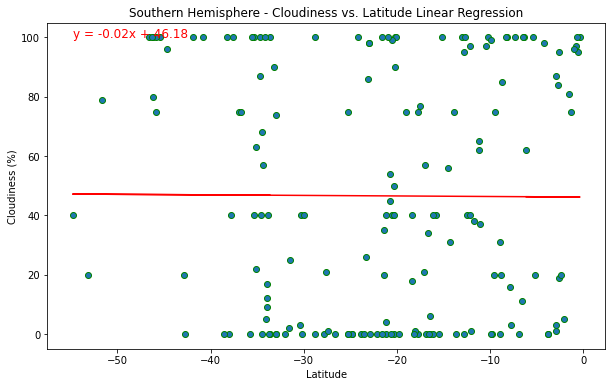

In [51]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("../Images/SH_lat_vs_cloudiness.png")

The low r values indicate that there is no real relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20850108274559592


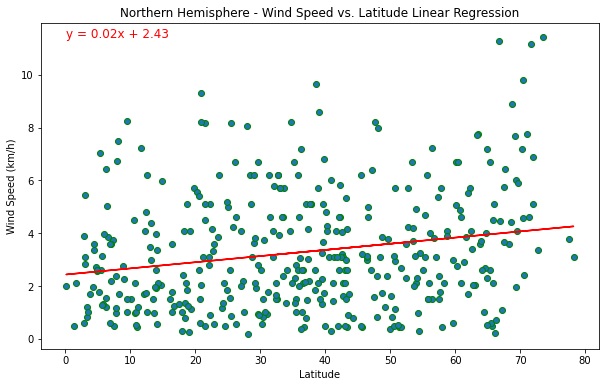

In [53]:
plt.figure(figsize=(10, 6))
linreg(northern_df["Lat"], northern_df["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.27888598083523297


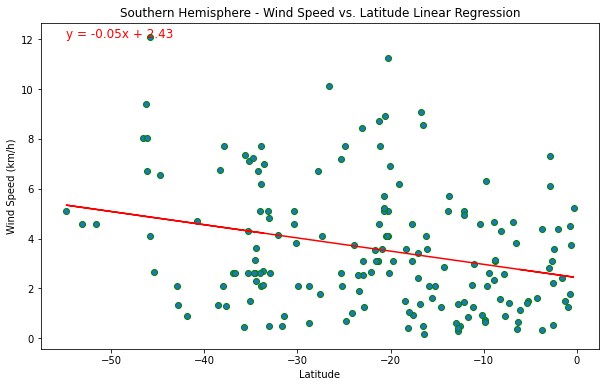

In [55]:
plt.figure(figsize=(10, 6))
linreg(southern_df["Lat"], southern_df["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.savefig("../Images/NH_lat_vs_wind.png")

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.